In [30]:
#import necessary library
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Import tensorflow flower datasets

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)

In [3]:
#show flower path
data_dir

'.\\datasets\\flower_photos'

In [4]:
#change into window object path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
#show all image as .jpg 
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

# Data Visualization

In [7]:
# show all the roses path as windows object
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

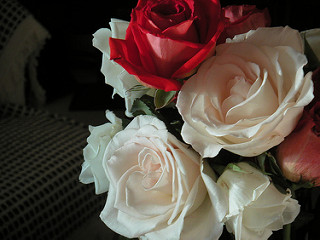

In [8]:
PIL.Image.open(str(roses[1]))

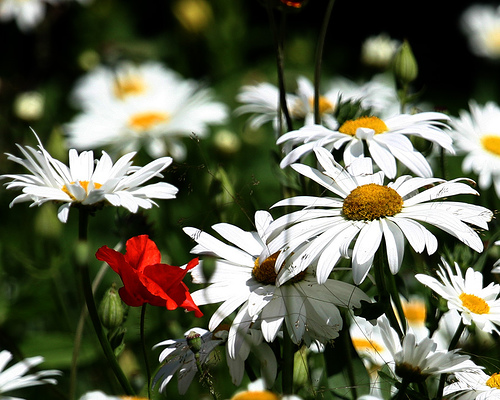

In [9]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[5]))

In [10]:
#dictionary to classify flowers
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
#set labels
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['sunflowers']

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1043442695_4556c4c13d_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1

In [13]:
flowers_images_dict['dandelion']

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/1074999133_1e4a1e042e.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10777398353_5a20bb218c.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10778387133_9141024b

## Data augmentation starts from here

In [14]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
x = np.array(x)
y = np.array(y)

## Use train_test_split method to divide the dataset for training and testing

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [20]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

## Scaling

In [21]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

## CNN model

In [22]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
       layers.Dense(128, activation ='relu'),
       layers.Dense(num_classes)
])
 
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x_train_scaled,y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 124s 1s/step - loss: 1.3577 - accuracy: 0.4102
Epoch 2/5
86/86 [==============================] - 119s 1s/step - loss: 0.9980 - accuracy: 0.6094
Epoch 3/5
86/86 [==============================] - 101s 1s/step - loss: 0.8255 - accuracy: 0.6835
Epoch 4/5
86/86 [==============================] - 94s 1s/step - loss: 0.5932 - accuracy: 0.7787
Epoch 5/5
86/86 [==============================] - 89s 1s/step - loss: 0.3682 - accuracy: 0.8656


In [23]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 31s 523ms/step - loss: 1.1077 - accuracy: 0.6307


[1.1077370643615723, 0.6307189464569092]

In [24]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 19s 304ms/step


array([[ 3.9493425 , 10.299818  ,  7.050284  , -8.081173  ,  0.5863596 ],
       [ 7.0090337 ,  4.133648  , -3.7395613 , -4.561771  ,  4.7367606 ],
       [-0.90761423,  3.2968783 ,  5.2836633 , -3.633817  , -0.9343663 ],
       ...,
       [ 1.7218615 ,  1.3806111 , -3.0441105 ,  3.4475942 ,  2.6694126 ],
       [ 0.6700354 ,  4.052872  ,  2.6404567 ,  0.35613185,  0.6753642 ],
       [ 0.17714879, -5.340989  ,  1.3007315 , -0.11180728,  2.8084812 ]],
      dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6778007e-03, 9.6098530e-01, 3.7278805e-02, 9.9989368e-09,
       5.8105266e-05], dtype=float32)>

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

# Data augmentation

In [46]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
])

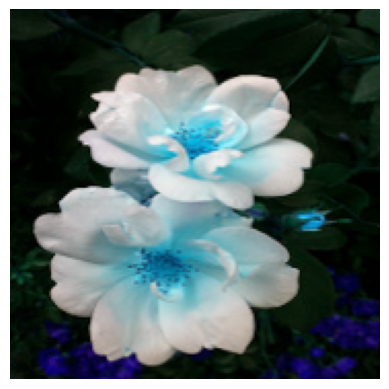

In [47]:
plt.axis('off')
plt.imshow(x[0])

In [49]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[219.62018, 206.89786, 208.74406],
        [225.33574, 213.03197, 214.60909],
        [227.88159, 216.85072, 217.65466],
        ...,
        [187.49152, 177.45062, 170.67757],
        [189.82057, 176.78122, 170.50792],
        [174.75871, 161.92065, 155.81815]],

       [[220.25711, 207.27206, 209.21017],
        [224.47673, 212.17282, 213.70085],
        [225.83604, 215.30453, 215.9697 ],
        ...,
        [181.52106, 172.85533, 166.90225],
        [186.88162, 174.94424, 169.4909 ],
        [176.43706, 164.1096 , 158.92958]],

       [[227.17793, 213.80632, 215.63129],
        [227.83502, 215.30453, 216.96916],
        [226.19751, 215.93887, 216.99039],
        ...,
        [177.9095 , 170.51614, 166.06227],
        [183.02031, 171.85583, 167.90173],
        [174.47578, 162.30862, 158.62782]],

       ...,

       [[140.7395 , 168.28722, 170.06134],
        [139.0755 , 168.12242, 170.56067],
        [137.46288, 168.009

# CNN with augmentation

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

## Evaluation after augmentation

In [ ]:
model.evaluate(X_test_scaled,y_test)